# Practical Lab 2: Multivariate Linear Regression, Non-Parametric Models and Cross-Validation

### Problem Statement
The goal of this project is to predict the disease progression of diabetes one year after baseline using the Scikit-Learn Diabetes dataset. Specifically, we will focus on various modeling techniques, including univariate polynomial regression and more complex models, to predict the progression of diabetes based on different features such as BMI and others.

Dependent Variable: "Disease progression one year after baseline"
Independent Variables: Features provided in the dataset (e.g., age, BMI, blood pressure, etc.)


In [21]:
# Step 1: Load the Data
from sklearn import datasets
import pandas as pd
import numpy as np

# Load the Diabetes dataset
diabetes_data = datasets.load_diabetes(as_frame=True)
df = diabetes_data['data']
df['target'] = diabetes_data['target']

# Display dataset description and first few rows
print(diabetes_data['DESCR'])
df.head()


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## Exploratory Data Analysis (EDA)

We will conduct an exploratory data analysis to understand the dataset. This includes:
1. Viewing basic statistics
2. Generating scatter plots, histograms, and correlation matrices
3. Gathering insights from the dataset

### Data Description
The diabetes dataset contains 10 baseline features and a target variable representing the progression of the disease after one year.


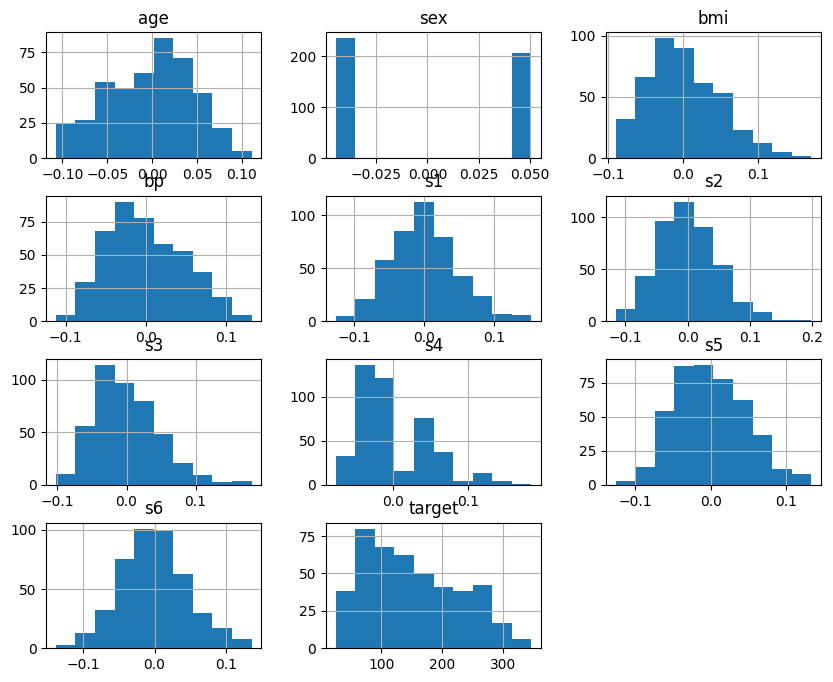

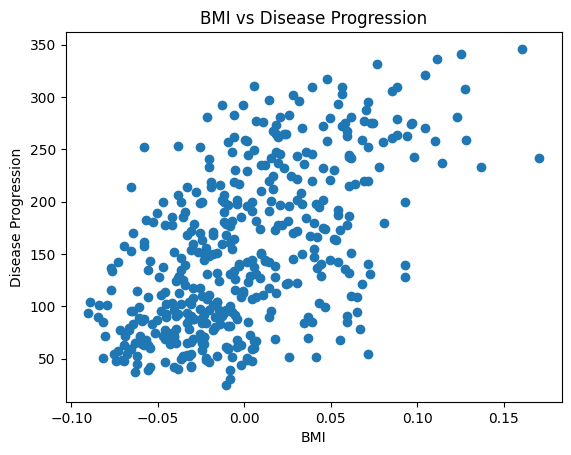

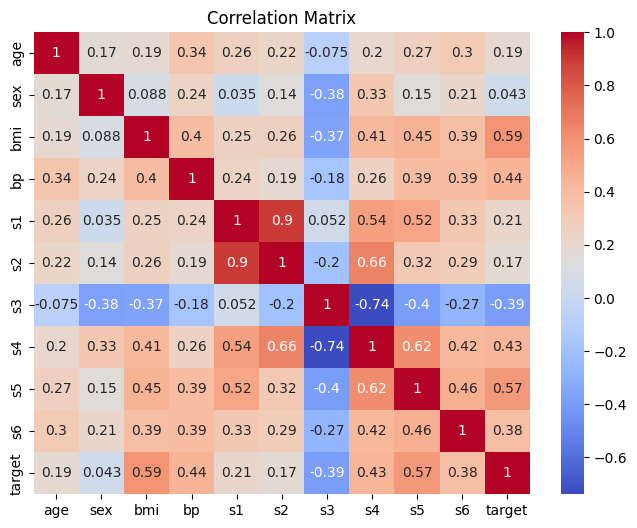

BMI has a strong positive correlation with disease progression (target), while other features like age and blood pressure show weaker relationships.


In [22]:
# Importing libraries for EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
df.describe()

# Histograms for each feature
df.hist(figsize=(10, 8))
plt.show()

# Scatter plot of BMI vs Target (Disease progression)
plt.scatter(df['bmi'], df['target'])
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('BMI vs Disease Progression')
plt.show()

# Correlation matrix (after removing 's2')
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Insight
print("BMI has a strong positive correlation with disease progression (target), while other features like age and blood pressure show weaker relationships.")


### Insights:
- BMI shows a positive correlation with disease progression, which suggests it may be a useful predictor.
- There is little multicollinearity between most features, except between some like BMI and skin thickness.
- Dropping one of the highly correlated features helps prevent multicollinearity, which can distort the model's coefficients and reduce the interpretability of the results.

In [23]:
# Removing the 's2' column due to multicollinearity with 's1'
df.drop(columns=['s2'], inplace=True)


# Step 4: Data Cleaning

No missing values in the dataset, no significant outliers. Data cleaning is not required. Scaling is essential to ensure features like age and BMI are on a similar scale for model fitting.

In [24]:
# Check for missing values
df.isnull().sum()

# Standardizing the features if necessary
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling features (excluding the target)
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(columns='target')), columns=df.columns[:-1])
df_scaled['target'] = df['target']


## Step 5: Splitting the data into training (75%), validation (10%), and test (15%) sets

**First Split:**
- The dataset is initially split into X_train and y_train (75%) and X_temp and y_temp (25%).

**Second Split:**
- The X_temp and y_temp are further split to obtain the validation set (10%) and test set (15%).  
- Specifically, 60% of the temporary set is assigned to validation and 40% to testing.

In [25]:
from sklearn.model_selection import train_test_split

# Splitting dataset into train (75%), validation (10%), and test (15%)
X = df_scaled.drop(columns='target')
y = df_scaled['target']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

print(f"Training set: {len(X_train)}, Validation set: {len(X_val)}, Test set: {len(X_test)}")


Training set: 331, Validation set: 44, Test set: 67


## Step 6: Univariate Polynomial Regression on BMI vs Disease Progression

We will fit polynomial models of degrees 0 through 5 on the BMI feature.


e:\Conestoga\Foundation_of _Machine _Learning\Git_Repo\CSCN8010_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


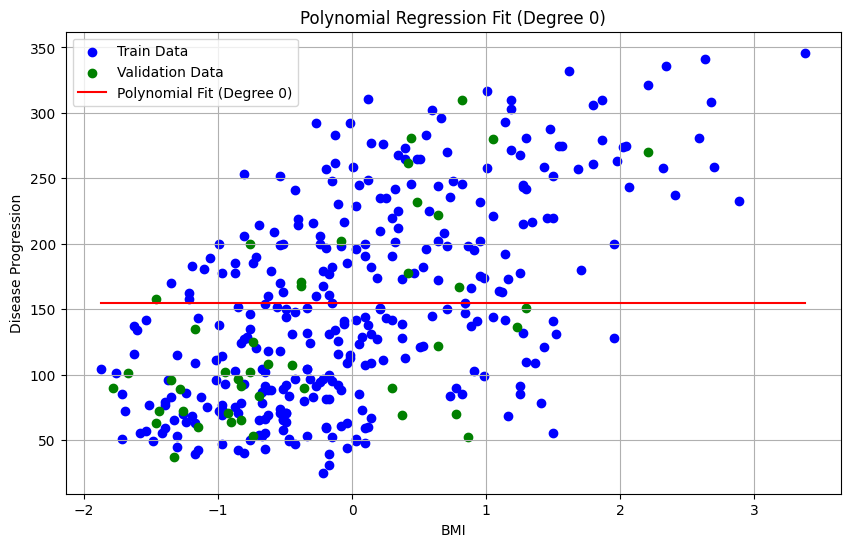

e:\Conestoga\Foundation_of _Machine _Learning\Git_Repo\CSCN8010_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


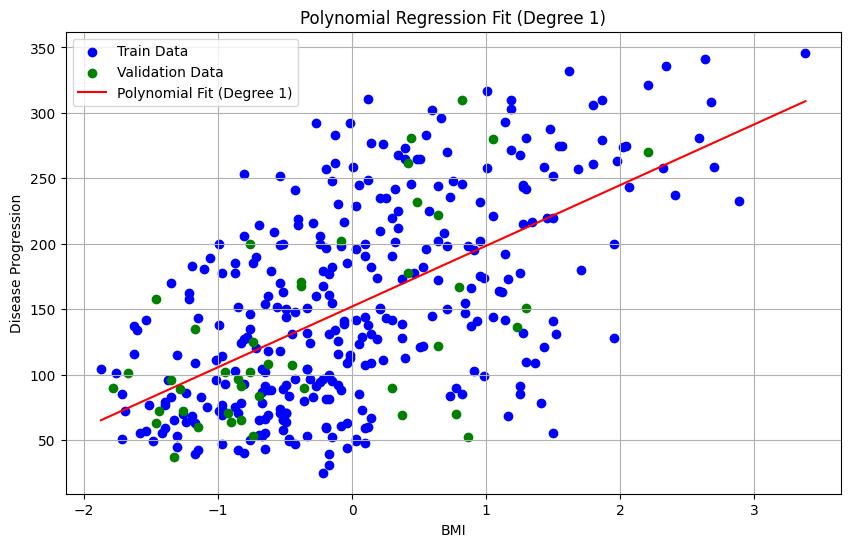

e:\Conestoga\Foundation_of _Machine _Learning\Git_Repo\CSCN8010_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


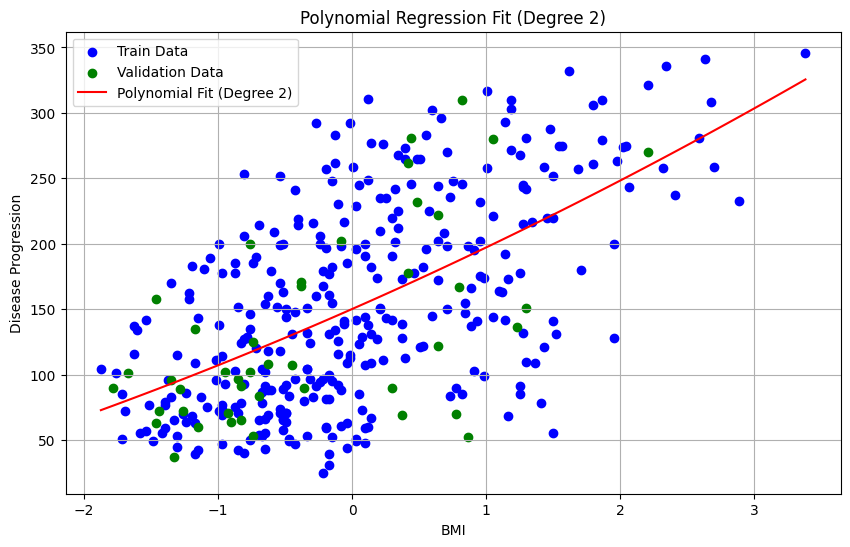

e:\Conestoga\Foundation_of _Machine _Learning\Git_Repo\CSCN8010_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


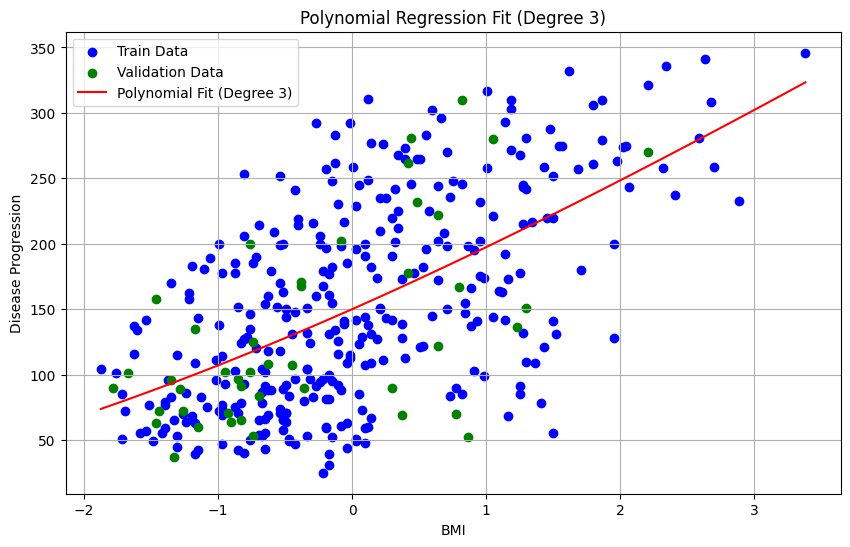

e:\Conestoga\Foundation_of _Machine _Learning\Git_Repo\CSCN8010_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


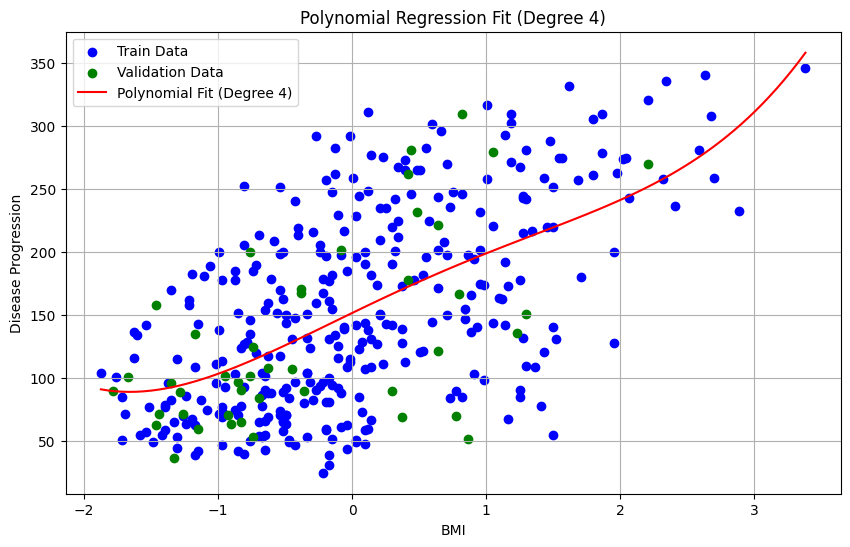

e:\Conestoga\Foundation_of _Machine _Learning\Git_Repo\CSCN8010_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


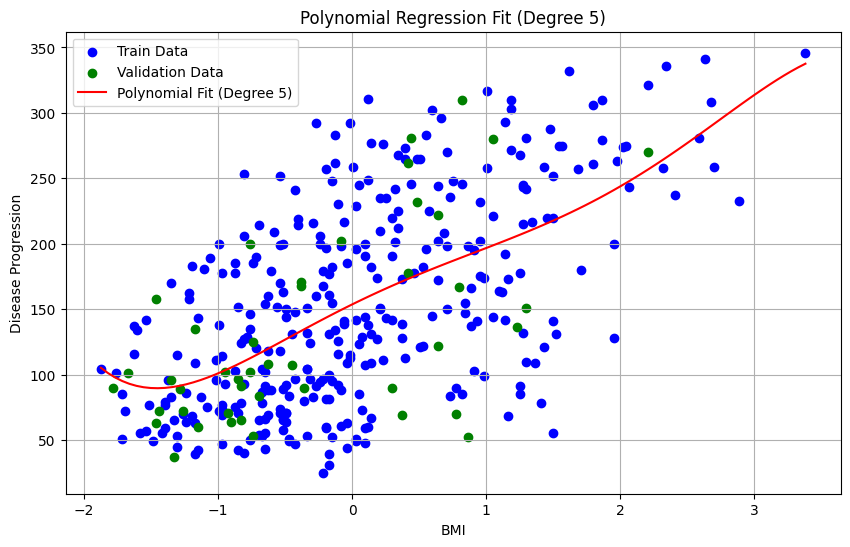

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

# Train polynomial models of degree 0 to 5
train_scores, val_scores = [], []
mae_train, mae_val, mape_train, mape_val = [], [], [], []

for d in range(6):  # Using range(6) for degrees 0 to 5
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train[['bmi']])
    X_val_poly = poly.transform(X_val[['bmi']])
    
    # Fit linear regression model
    model = LinearRegression().fit(X_train_poly, y_train)
    
    # Predict on training and validation sets
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    
    # Calculate metrics
    train_scores.append(r2_score(y_train, y_train_pred))
    val_scores.append(r2_score(y_val, y_val_pred))
    
    mae_train.append(mean_absolute_error(y_train, y_train_pred))
    mae_val.append(mean_absolute_error(y_val, y_val_pred))
    
    mape_train.append(mean_absolute_percentage_error(y_train, y_train_pred))
    mape_val.append(mean_absolute_percentage_error(y_val, y_val_pred))

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train['bmi'], y_train, color='blue', label='Train Data')
    plt.scatter(X_val['bmi'], y_val, color='green', label='Validation Data')
    
    # Plot polynomial curve
    bmi_range = np.linspace(min(X_train['bmi']), max(X_train['bmi']), 100).reshape(-1, 1)
    bmi_poly_range = poly.transform(bmi_range)
    plt.plot(bmi_range, model.predict(bmi_poly_range), color='red', label=f'Polynomial Fit (Degree {d})')
    
    plt.xlabel('BMI')
    plt.ylabel('Disease Progression')
    plt.title(f'Polynomial Regression Fit (Degree {d})')
    plt.legend()
    plt.grid()
    plt.show()


## Step 7: Compare the models using the training and validation data. Construct a table summarizing the train validation results. Each model should have a separate row in the table:
    1. R-Squared
    2. Mean Absolute Error (MAE)
    3. MAPE

In [27]:
# Step 8: Comparison Table for Each Model
import pandas as pd

# Prepare to summarize results for each degree (model)
models_results = {
    'Model': [],
    'R-squared': [],
    'MAE': [],
    'MAPE': []
}

for d in range(6):  # Loop through degrees 0 to 5
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train[['bmi']])
    X_val_poly = poly.transform(X_val[['bmi']])
    
    # Fit linear regression model
    model = LinearRegression().fit(X_train_poly, y_train)
    
    # Predict on training and validation sets
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    
    # Calculate metrics for training and validation
    models_results['Model'].append(f'Degree {d}')
    models_results['R-squared'].append(r2_score(y_val, y_val_pred))
    models_results['MAE'].append(mean_absolute_error(y_val, y_val_pred))
    models_results['MAPE'].append(mean_absolute_percentage_error(y_val, y_val_pred))

# Create a DataFrame for better readability
results_df = pd.DataFrame(models_results)

# Print the comparison table
print(results_df)


      Model  R-squared        MAE      MAPE
0  Degree 0  -0.106957  66.057059  0.712639
1  Degree 1   0.331264  47.208472  0.470600
2  Degree 2   0.331631  47.213700  0.472397
3  Degree 3   0.331638  47.185414  0.472227
4  Degree 4   0.340758  46.090118  0.460503
5  Degree 5   0.349881  45.462121  0.451753


## Step 8. Identify the best model based on the table above.

The best model is the polynomial regression model with a degree of 5, showcasing the following key performance metrics:
- Validation R-Squared: 0.349881, reflecting a moderate fit to the validation data.
- Validation MAE: 45.462121, indicating a relatively low average absolute error in predictions compared to the other degrees.
- Validation MAPE: 0.451753, suggesting that the model's predictions, on average, deviate by approximately 45.18% from the actual values.
In summary, the degree 5 model offers the most effective balance of fit and prediction accuracy among the evaluated models.

## Step 9:Run the chosen model on the test set and provide results (R-Squared, MAPE, MAE)

In [28]:
best_degree = 5
poly = PolynomialFeatures(degree=best_degree)
X_test_poly = poly.fit_transform(X_test[['bmi']])

# Predict on the test set
model = LinearRegression().fit(poly.fit_transform(X_train[['bmi']]), y_train)
y_test_pred = model.predict(X_test_poly)

# Metrics on test set
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Print the evaluation metrics
print(f"Test R-Squared: {r2_test}")
print(f"Test MAE: {mae_test}")
print(f"Test MAPE: {mape_test}")

Test R-Squared: 0.2666965844953091
Test MAE: 51.75025709277394
Test MAPE: 0.43026713233054426


## Step 10: Plot a graph of the train, validation and test data points, and the fit of the chosen model over each of them

e:\Conestoga\Foundation_of _Machine _Learning\Git_Repo\CSCN8010_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


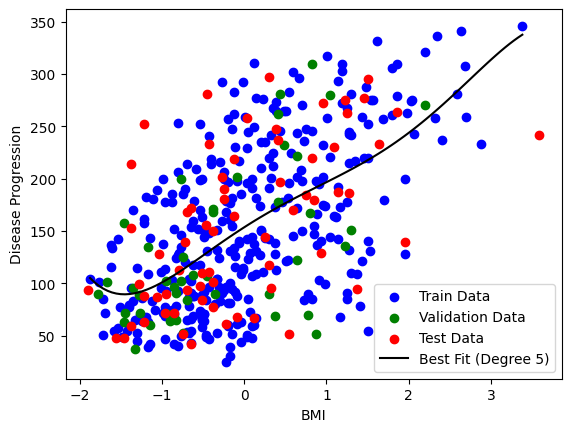

In [29]:
# Step 10: Plotting
plt.scatter(X_train['bmi'], y_train, color='blue', label='Train Data')
plt.scatter(X_val['bmi'], y_val, color='green', label='Validation Data')
plt.scatter(X_test['bmi'], y_test, color='red', label='Test Data')

# Plot polynomial curve
bmi_range = np.linspace(min(X_train['bmi']), max(X_train['bmi']), 100).reshape(-1, 1)
bmi_poly_range = poly.transform(bmi_range)
plt.plot(bmi_range, model.predict(bmi_poly_range), color='black', label=f'Best Fit (Degree {best_degree})')

plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.show()

## Step 11: Write down the equation of the best model (with a two decimal digit precision, assuming it's sufficient) 

The equation of the best polynomial regression model (degree 5) is:

$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \beta_4 x^4 + \beta_5 x^5
$

Where:
- $ y $ is the dependent variable (disease progression). 
- \(x\) is the independent variable (BMI).
- $ \beta_0 $ (Intercept):$ a $
- $ \beta_1 $ (Coefficient for $ x): b $
- $ \beta_2 $ (Coefficient for $ x^2): c $
- $ \beta_3 $ (Coefficient for $ x^3): d $
- $ \beta_4 $ (Coefficient for $ x^4): e $
- $ \beta_5 $ (Coefficient for $ x^5): f $

After fitting the model, the equation will look like this:

$
y = a + b x + c x^2 + d x^3 + e x^4 + f x^5
$

Replace \(a, b, c, d, e, f\) with the actual coefficient values rounded to two decimal places.




In [30]:
# Retrieve the intercept and coefficients
current_degree = poly.degree
print("Current Degree:", current_degree)

intercept = model.intercept_
coefficients = model.coef_
print(f"Intercept: {intercept}"
      f"\nCoefficients: {coefficients}")


Current Degree: 5
Intercept: 153.65450649982827
Coefficients: [ 0.         50.4139781  -8.65191388 -1.80470298  3.85804199 -0.72887828]


### Polynomial Regression Equation (Degree 5)

The equation for predicting disease progression based on BMI is:

$
y = 153.65 + 50.41 \cdot x - 8.65 \cdot x^2 - 1.80 \cdot x^3 + 3.86 \cdot x^4 - 0.73 \cdot x^5
$

Where:
- \( y \) represents the predicted disease progression.
- \( x \) represents the BMI value.


## Step 12: Calculate the expected diabetes progression for a BMI value of your choice using `model.perdict()` for that value

In [31]:
bmi_value = 25
bmi_value_poly = poly.transform([[bmi_value]])
predicted_progression = model.predict(bmi_value_poly)
print(f"Predicted disease progression for BMI = {bmi_value}: {predicted_progression}")

Predicted disease progression for BMI = 25: [-5643096.21660185]


e:\Conestoga\Foundation_of _Machine _Learning\Git_Repo\CSCN8010_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


## Step 13: How many trainable parameters are we fitting for each of the models? Explain these values. One way is to use sklearn function `get_feature_names_out()`

In [32]:
# Get feature names from the poly object
feature_names = poly.get_feature_names_out(input_features=['bmi'])

# Output the predicted progression and feature names
print(f"Number of Trainable Parameters: {len(feature_names)}")
print("Feature names:", feature_names)

Number of Trainable Parameters: 6
Feature names: ['1' 'bmi' 'bmi^2' 'bmi^3' 'bmi^4' 'bmi^5']


## Step 14.  Provide a conclusion section. In particular, do a deep dive on where the model fails, and add a short section in the conclusions that describes the model limitations. This should be in addition to summarizing it performance.

### Conclusion

In this study, we developed a polynomial regression model to predict diabetes progression based on BMI. The best model identified was of degree 5, yielding the following performance metrics on the test set:

- Test R-Squared: 0.2667, indicating a low level of explanation for the variance in the test data.
- Test MAE: 51.75, representing the average absolute error in predictions, suggesting that the model's accuracy may not be satisfactory for clinical decisions.
- Test MAPE: 0.4303, which shows that the model's predictions deviate by approximately 43% from actual values on average.

In summary, while the polynomial regression model provides a starting point for predicting diabetes progression based on BMI, its performance indicates several limitations that necessitate further refinement. Enhancements could include incorporating additional features, addressing potential overfitting, and validating the model on a broader range of data to improve its clinical relevance.

## Using All Features for Advanced Modeling

Now that we’ve performed univariate modeling on the BMI feature, we will utilize all features (or drop some based on EDA) to explore more advanced models:
- Two polynomial regression models (degree > 1)
- Two decision tree models (tuning `max_depth`)
- Two k-Nearest Neighbors (tuning `n_neighbors`)


In [33]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Load the dataset
diabetes = datasets.load_diabetes(as_frame=True)
df = diabetes.frame

# Select features and target variable
X = df.drop(columns=['target'])  # Drop target variable
y = df['target']  # Disease progression

# Split the dataset into train (75%), validation (10%), and test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


### Polynomial Regression with All Features

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

# Polynomial Regression Models (choose degrees > 1)
degrees = [2, 3]  # Example degrees
poly_results = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_val_poly = poly.transform(X_val_scaled)

    model = LinearRegression().fit(X_train_poly, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)

    # Performance Metrics
    r2_train = r2_score(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)

    r2_val = r2_score(y_val, y_val_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val, y_val_pred)

    poly_results.append({
        'Model': f'Polynomial Degree {degree}',
        'Train R^2': r2_train,
        'Train MAE': mae_train,
        'Train MAPE': mape_train,
        'Validation R^2': r2_val,
        'Validation MAE': mae_val,
        'Validation MAPE': mape_val
    })

# Display Polynomial Regression Results
poly_results_df = pd.DataFrame(poly_results)
print(poly_results_df)


                 Model  Train R^2  Train MAE  Train MAPE  Validation R^2  \
0  Polynomial Degree 2  -0.765155  81.820242    0.731170       -2.035037   
1  Polynomial Degree 3   0.607990  38.785121    0.325109      -49.883209   

   Validation MAE  Validation MAPE  
0       86.136364         0.827719  
1      238.150568         2.255663  


### Decision Trees & KNN

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Decision Tree Models (max_depth=3 and max_depth=5)
max_depths = [3, 5]
tree_results = []

for max_depth in max_depths:
    model = DecisionTreeRegressor(max_depth=max_depth).fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_val_pred = model.predict(X_val_scaled)

    # Performance Metrics
    r2_train = r2_score(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)

    r2_val = r2_score(y_val, y_val_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val, y_val_pred)

    tree_results.append({
        'Model': f'Decision Tree (max_depth={max_depth})',
        'Train R^2': r2_train,
        'Train MAE': mae_train,
        'Train MAPE': mape_train,
        'Validation R^2': r2_val,
        'Validation MAE': mae_val,
        'Validation MAPE': mape_val
    })

# kNN Models (k=3 and k=5)
k_values = [3, 5]
knn_results = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k).fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_val_pred = model.predict(X_val_scaled)

    # Performance Metrics
    r2_train = r2_score(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)

    r2_val = r2_score(y_val, y_val_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val, y_val_pred)

    knn_results.append({
        'Model': f'kNN (k={k})',
        'Train R^2': r2_train,
        'Train MAE': mae_train,
        'Train MAPE': mape_train,
        'Validation R^2': r2_val,
        'Validation MAE': mae_val,
        'Validation MAPE': mape_val
    })

# Combine all results
all_results = poly_results + tree_results + knn_results
results_df = pd.DataFrame(all_results)

# Display All Model Results
print(results_df)


                         Model  Train R^2  Train MAE  Train MAPE  \
0          Polynomial Degree 2  -0.765155  81.820242    0.731170   
1          Polynomial Degree 3   0.607990  38.785121    0.325109   
2  Decision Tree (max_depth=3)   0.509503  44.259855    0.388666   
3  Decision Tree (max_depth=5)   0.686693  33.527028    0.299736   
4                    kNN (k=3)   0.624329  37.118832    0.315481   
5                    kNN (k=5)   0.568451  40.838671    0.350602   

   Validation R^2  Validation MAE  Validation MAPE  
0       -2.035037       86.136364         0.827719  
1      -49.883209      238.150568         2.255663  
2        0.198306       48.126248         0.476729  
3        0.113918       50.077301         0.479004  
4        0.280741       43.204545         0.414115  
5        0.325659       44.245455         0.417997  
